# object detection image segmentation

In [27]:
!source venv/bin/activate

In [7]:
# import os
# print(os.getcwd())

/Users/saichi/Documents/GitHub/declutter


In [51]:
!pip install ultralytics

In [52]:
!pip install pathlib numpy opencv-python

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from pathlib import Path
from ultralytics import YOLO
import cv2 as cv

model_seg = YOLO('yolov8n-seg.pt')
imgs=['./image1.jpg']
img = mpimg.imread(imgs[0]) #Replace "image.jpg" with the path of your image
H , W , _ = cv.imread(imgs[0]).shape
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './image1.jpg'

In [19]:
result_seg = model_seg(img)


0: 640x640 1 bowl, 1 couch, 2 potted plants, 1 dining table, 1 book, 3 vases, 110.6ms
Speed: 2.0ms preprocess, 110.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


In [22]:

result_seg[0].masks.data[0].unique()
# result_seg[0].show()  # display to screen
result_seg[0].save(filename='seg_res.jpg')  # save to disk


'seg_res.jpg'

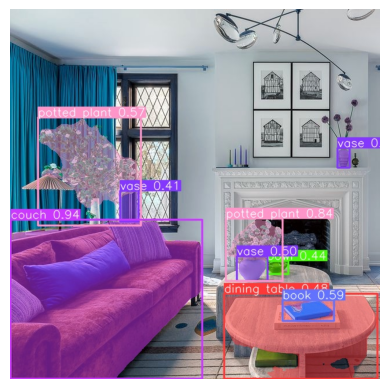

In [23]:

res = mpimg.imread('seg_res.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(res)
plt.axis('off')
plt.show()

# create mask

In [40]:
def inverte(imagem, name):
    imagem = (255-imagem)
    cv.imwrite(name, imagem)

In [41]:
for j, mask in enumerate(result_seg[0].masks.data):

    mask = mask.cpu().numpy() * 255
    mask = mask.astype(np.uint8)
    mask = np.squeeze(mask)
    mask = np.stack([mask, mask, mask], axis=-1)
    mask = mask.astype(np.uint8)

    mask = cv.resize(mask, (W, H))


    cv.imwrite(f'./resmask{j}.png', mask)
    inverte(mask,f'./invresmask{j}.png')

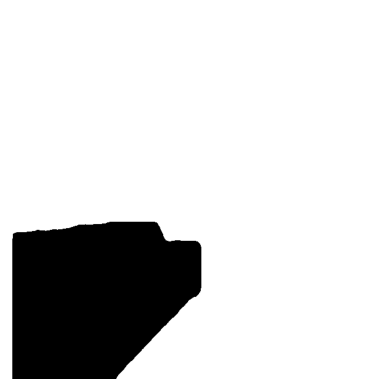

In [42]:
maskres = mpimg.imread('invresmask0.png') #Replace "image.jpg" with the path of your image
plt.imshow(maskres)
plt.axis('off')
plt.show()

# combined mask

In [ ]:
# def create_combined_mask(mask_iterator, img_size):
#     combined_mask = np.zeros(img_size, dtype=np.uint8)
    
#     for j, mask in enumerate(mask_iterator):
#         mask = mask.cpu().numpy() * 255
#         mask = mask.astype(np.uint8)
#         mask = np.squeeze(mask)
#         mask = np.stack([mask, mask, mask], axis=-1)
#         mask = mask.astype(np.uint8)
#         mask = cv.resize(mask, img_size[::-1])  # Assuming img_size is (width, height)

#         combined_mask = np.maximum(combined_mask, mask)

#     combined_mask = np.clip(combined_mask, 0, 255).astype(np.uint8)
#     return combined_mask


In [47]:
!pip install python-io typing pillow

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for python-io: filename=Python_IO-0.3-py3-none-any.whl size=1647 sha256=170bf7b5747acff64c4f2cd43a126e00b23f865f411076a7bd0ddb6f8cfbb323
  Stored in directory: /Users/saichi/Library/Caches/pip/wheels/a6/da/8b/8d32ce5cab0b940f313a79c8e49eab1bc3f92bf541e49e1d27
Successfully built python-io


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


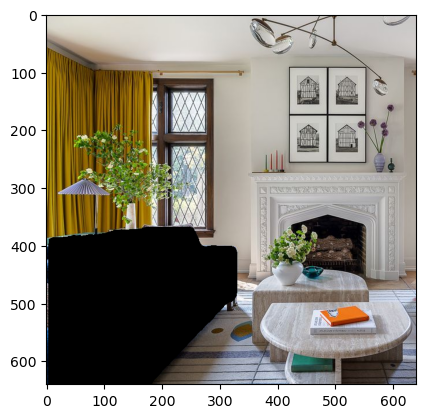

In [49]:

img_with_mask = img * (maskres[:,:] / 255.0)
cr=plt.imshow(img_with_mask)
cv.imwrite('./image_mask', cr)
cr=plt.axis('off')
cr=plt.title('img * mask')
plt.show()

# LaMa infill attempt 1

# base code

In [48]:
import base64
from io import BytesIO
from typing import List, Tuple

from PIL import Image

def image_to_base64(image: Image.Image, format="JPEG") -> str:
    """Convert an image to its base64 representation."""
    buffer = BytesIO()
    image.save(buffer, format=format)
    image_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return image_str


def base64_to_image(image_str: str) -> Image.Image:
    """Convert an image from its base64 representation."""
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


def image_grid(imgs: List[Image.Image], rows: int = 2, cols: int = 2):
    """Display images in a grid."""
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [36]:
print('\n> Install dependencies')
# !pip install torch torchvision torchaudio torchtext
# !pip install -r lama/requirements.txt --quiet
# !pip install wget --quiet



# print('\n> Changing the dir to:')

# print('\n> Download the model')
# !curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
# !unzip big-lama.zip

# print('>fixing opencv')
# !pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless --quiet


# print('\n> Init mask-drawing code')
# import base64, os
# from IPython.display import HTML, Image
# from base64 import b64decode
# import matplotlib.pyplot as plt
# import numpy as np
# import wget
# from shutil import copyfile
# import shutil



> Install dependencies


In [5]:
import base64, os
from IPython.display import HTML, Image
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil


In [ ]:



  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/testing outdir=$(pwd)/output  dataset.img_suffix=.jpg > /dev/null
